# Drift normalized by observing frequency vs. Burst Duration

In [1]:
import numpy as np
import scipy.stats
import scipy.odr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from tqdm import tqdm
import functools
print = functools.partial(print, flush=True) # print doesn't happen til script ends so force it to flush... windows thing?
import pandas as pd
import driftlaw

bursts121102 = pd.read_csv('data/aggregate/burstsFRB121102.csv') 
bursts121102 = bursts121102.set_index('name')
##########
bursts180916 = pd.read_csv('data/aggregate/burstsFRB180916.csv') 
bursts180916 = bursts180916.set_index('name')
bursts180916['time_res'] = 0.00098304 # s
#########
bursts180814 = pd.read_csv('data/aggregate/burstsFRB180814.csv') # DM = 188.9 pc/cm3
bursts180814 = bursts180814.set_index('name')
bursts180814['time_res'] = 0.00098304 # s, Not true for burst 180917
###########
burstsSGR1935 = pd.read_csv('data/aggregate/SGR1935+2154bursts.csv')
burstsSGR1935 = burstsSGR1935.set_index('name')
##########

# Set redshifts
bursts121102['z']  = 0.19273 # (josephy et al. 2019, frbcat.org)
bursts180916['z']  = 0.0337  # (chime 2020b et al.)
bursts180814['z']  = 0.05    # not accurate, z < 0.1 (amiri et al. 2019)
burstsSGR1935['z'] = 0       # ? galactic


#######
bursts121102 = driftlaw.computeModelDetails(bursts121102)
bursts121102.at['C1', 'tau_w_ms'] = 11.4
bursts121102.at['C1', 'tau_w'] = 11.4/1000
bursts121102.at['C1', 'tau_w_error'] = 0.12
bursts121102_to_include = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9a', 'M9b', 'M10a', 'M10b', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'G11D', 'G11A1a', 'G11A1b', 'G11A2', 'G11A3', 'C1']
selectbursts121102 = bursts121102.loc[bursts121102_to_include]

bursts180916 = driftlaw.computeModelDetails(bursts180916)
selectbursts180916 = bursts180916

bursts180814 = driftlaw.computeModelDetails(bursts180814)
selectbursts180814 = bursts180814.drop(180917)

burstsSGR1935 = driftlaw.computeModelDetails(burstsSGR1935)
#display(bursts121102[['tau_w', 'tau_w_error']], bursts180916[['tau_w', 'tau_w_error']], bursts180814[['tau_w', 'tau_w_error']], burstsSGR1935[['tau_w', 'tau_w_error']])

In [2]:
fit_model = scipy.odr.Model(driftlaw.reciprocal_odr)
fit_model_log = scipy.odr.Model(driftlaw.reciprocal_odr_log)
# Color by source
selectbursts121102['color'] = 'r'#'c'
selectbursts121102.at[selectbursts121102.index > 'M', 'color'] = 'r'
selectbursts121102.at['C1', 'color'] = 'r'#'b'
selectbursts180916['color']          = 'b'
selectbursts180814['color']          = 'g'
burstsSGR1935['color']               = 'k'
michillibursts = selectbursts121102.head(18)
otherbursts = selectbursts121102.tail(6)
burstsSGR1935['drift (mhz/ms)']

name
CHIME1     -87.942225
CHIME2    -137.550708
B1       -5501.734912
B2       -3174.179985
S1        -463.136902
Name: drift (mhz/ms), dtype: float64

[0.08219169] [0.00578148]
[0.0823007] [0.00626765]
[0.0714318] [0.00999098]


<ipython-input-3-42e6dec11443>:122: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(x, opt[0]/x, l, label=lstr)
<ipython-input-3-42e6dec11443>:122: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(x, opt[0]/x, l, label=lstr)
<ipython-input-3-42e6dec11443>:122: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(x, opt[0]/x, l, label=lstr)


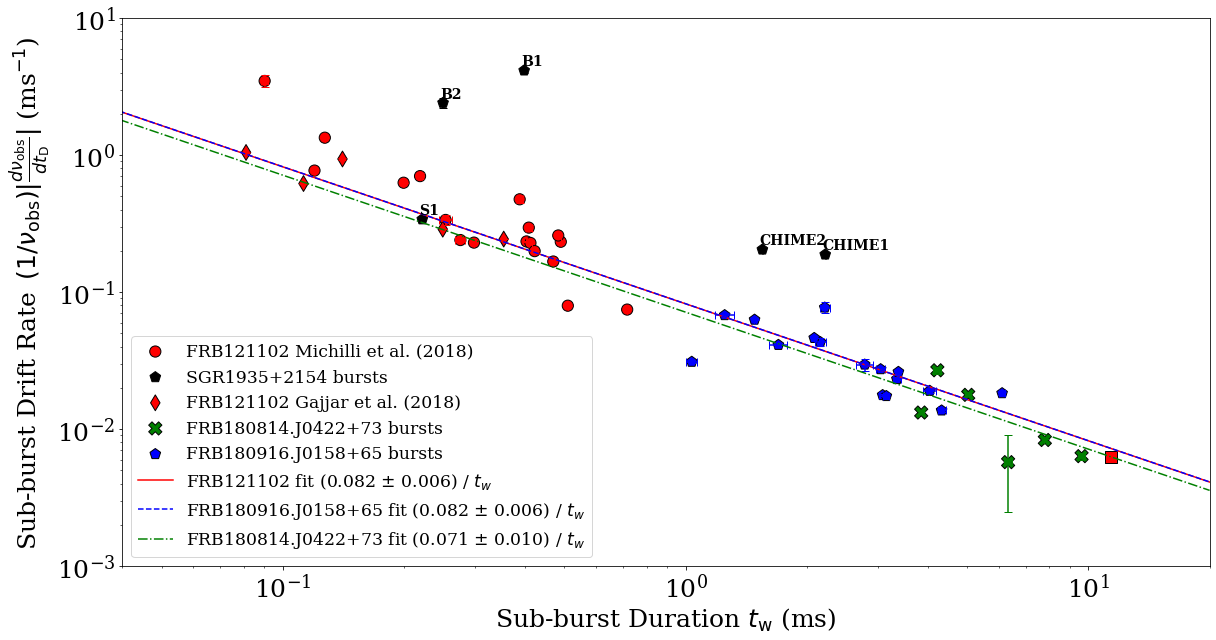

In [3]:
plt.rcParams["errorbar.capsize"] = 4
plt.rcParams["font.family"] = "serif"

markersize = 125#100
fontsize = 25 #18
annotsize = 14
logscale = True
filename = 'log_drift_over_nu_obsvsduration' if logscale else 'drift_over_nu_obsvsduration'
figsize = (17, 8)
figsize = (17, 9)
# figsize = (14, 10)


ax = michillibursts.plot.scatter(x='tau_w_ms', y='drift_over_nuobs', 
                               xerr=np.sqrt(michillibursts['red_chisq'])*michillibursts['tau_w_error'], 
                               yerr=np.sqrt(michillibursts['red_chisq'])*michillibursts['drift error (mhz/ms)']/michillibursts['center_f'], 
                               figsize=figsize, s=markersize, c='color', colorbar=False, fontsize=fontsize, logy=logscale, logx=logscale, marker='o', edgecolors='k',
                               label='FRB121102 Michilli et al. (2018)')
    
selectbursts180916.plot.scatter(ax=ax, x='tau_w_ms', y='drift_over_nuobs', 
                               xerr=np.sqrt(selectbursts180916['red_chisq'])*selectbursts180916['tau_w_error'], 
                               yerr=np.sqrt(selectbursts180916['red_chisq'])*selectbursts180916['drift error (mhz/ms)']/selectbursts180916['center_f'], 
                               figsize=figsize, s=markersize, c='color', colorbar=False, fontsize=fontsize, logy=logscale, logx=logscale, marker='p', edgecolors='k',
                               label='FRB180916.J0158+65 bursts')
selectbursts180814.plot.scatter(ax=ax, x='tau_w_ms', y='drift_over_nuobs', 
                               xerr=np.sqrt(selectbursts180814['red_chisq'])*selectbursts180814['tau_w_error'], 
                               yerr=np.sqrt(selectbursts180814['red_chisq'])*selectbursts180814['drift error (mhz/ms)']/selectbursts180814['center_f'], 
                               figsize=figsize, s=markersize+50, c='color', colorbar=False, fontsize=fontsize, logy=logscale, logx=logscale, marker='X', edgecolors='k',
                               label='FRB180814.J0422+73 bursts')
                               #label='FRB180814.J0422+73 bursts @ DM={} pc/cm$^3$'.format(dms180814[dm_idx]))
burstsSGR1935.plot.scatter(ax=ax, x='tau_w_ms', y='drift_over_nuobs', 
                               xerr=np.sqrt(burstsSGR1935['red_chisq'])*burstsSGR1935['tau_w_error'], 
                               yerr=np.sqrt(burstsSGR1935['red_chisq'])*burstsSGR1935['drift error (mhz/ms)']/burstsSGR1935['center_f'], 
                               figsize=figsize, s=markersize, c='color', colorbar=False, fontsize=fontsize, logy=logscale, logx=logscale, marker='p', edgecolors='k',
                               label='SGR1935+2154 bursts')

otherbursts.head(5).plot.scatter(ax=ax, x='tau_w_ms', y='drift_over_nuobs',
                         xerr=np.sqrt(otherbursts['red_chisq'])*otherbursts['tau_w_error'], 
                         yerr=np.sqrt(otherbursts['red_chisq'])*otherbursts['drift error (mhz/ms)']/otherbursts['center_f'], edgecolors='k',
                         figsize=figsize, s=markersize, c='color', colorbar=False, marker='d', label='FRB121102 Gajjar et al. (2018)') 
otherbursts.tail(1).plot.scatter(ax=ax, x='tau_w_ms', y='drift_over_nuobs',
                         xerr=np.sqrt(otherbursts['red_chisq'])*otherbursts['tau_w_error'], 
                         yerr=np.sqrt(otherbursts['red_chisq'])*otherbursts['drift error (mhz/ms)']/otherbursts['center_f'], edgecolors='k',
                         figsize=figsize, s=markersize, c='color', colorbar=False, marker='s', label='FRB121102 Josephy et al. (2019)') 

# for k, v in otherbursts.iterrows():
#     ax.annotate(k+'_c', (v['tau_w_ms'], v['drift_over_nuobs']), xytext=(-3,5), textcoords='offset points', weight='bold', size=annotsize)
# for k, v in michillibursts.iterrows():
#     ax.annotate(k, (v['tau_w_ms'], v['drift_over_nuobs']), xytext=(-3,5), textcoords='offset points', weight='bold', size=annotsize)
# for k, v in selectbursts180916.iterrows():
#     ax.annotate(int(k) if k != 15.5 else k, (v['tau_w_ms'], v['drift_over_nuobs']), xytext=(-3,5), textcoords='offset points', weight='bold', size=annotsize)
for k, v in burstsSGR1935.iterrows():
    if v['drift_over_nuobs'] > 0 or not logscale:
        ax.annotate(k, (v['tau_w_ms'], v['drift_over_nuobs']), xytext=(-3,5), textcoords='offset points', weight='bold', size=annotsize)
# for k, v in selectbursts180814.iterrows():
#     if v['drift_over_nuobs'] > 0:
#         ax.annotate(k, (v['tau_w_ms'], v['drift_over_nuobs']), xytext=(-3,5), textcoords='offset points', weight='bold', size=annotsize)

if not logscale:
    pass
    # ax.set_xlim(-0.1, 20)
    # ax.set_ylim(-0.2, 4)
elif logscale:
    ax.set_xlim(0.04, 20)
    ax.set_ylim(10**-3, 10**1)

# ax.set_title('Sub-burst Drift Rate vs. Burst Duration (fit to Michilli bursts)', size=fontsize)
ax.set_xlabel('Sub-burst Duration $t_\\mathrm{w}$ (ms)', size=fontsize)
ax.set_ylabel('Sub-burst Drift Rate $\,(1/\\nu_{\\mathrm{obs}}) \left|\\frac{d\\nu_\\mathrm{obs}}{dt_\\mathrm{D}}\\right|$ (ms$^{-1}$)', size=fontsize)

def driftnu_error(frame):
    sx = np.log((frame['tau_w_ms'] + np.sqrt(frame['red_chisq'])*frame['tau_w_error']) / frame['tau_w_ms'])
    sy = np.log((frame['drift_over_nuobs'] + np.sqrt(frame['red_chisq'])*(frame['drift error (mhz/ms)'])) / frame['drift_over_nuobs'])
    return sx, sy

# ODR fit log
num_to_fit = 24 #23 to exlude chime
fitdata_log = scipy.odr.RealData(np.log(selectbursts121102.head(num_to_fit)['tau_w_ms']), 
                             np.log(selectbursts121102.head(num_to_fit)['drift_over_nuobs']),
                             sx=driftnu_error(selectbursts121102.head(num_to_fit))[0],
                             sy=driftnu_error(selectbursts121102.head(num_to_fit))[1])
                             #sx=np.log(np.sqrt(selectbursts121102.head(num_to_fit)['red_chisq'])*selectbursts121102.head(num_to_fit)['tau_w_error']), 
                             #sy=np.log(np.sqrt(selectbursts121102.head(num_to_fit)['red_chisq'])*selectbursts121102.head(num_to_fit)['drift error (mhz/ms)']/selectbursts121102.head(num_to_fit)['center_f']))
odrfitter_log = scipy.odr.ODR(fitdata_log, fit_model_log, beta0=[500])
odrfitter_log.set_job(fit_type=0)
odrfit_log = odrfitter_log.run()

# ODR fit log 180916
fitdata_log_180916 = scipy.odr.RealData(np.log(selectbursts180916['tau_w_ms']), 
                             np.log(selectbursts180916['drift_over_nuobs']),
                             sx=driftnu_error(selectbursts180916)[0],
                             sy=driftnu_error(selectbursts180916)[1])
                             #sx=np.log(np.sqrt(selectbursts180916['red_chisq'])*selectbursts180916['tau_w_error']), 
                             #sy=np.log(np.sqrt(selectbursts180916['red_chisq'])*selectbursts180916['drift error (mhz/ms)']/selectbursts180916['center_f'] ))
odrfitter_log180916 = scipy.odr.ODR(fitdata_log_180916, fit_model_log, beta0=[1000])
odrfitter_log180916.set_job(fit_type=0)
odrfit_log180916 = odrfitter_log180916.run()

# ODR fit log 180814
fitdata_log_180814 = scipy.odr.RealData(np.log(selectbursts180814['tau_w_ms']), 
                             np.log(selectbursts180814['drift_over_nuobs']),
                             sx=driftnu_error(selectbursts180814)[0],
                             sy=driftnu_error(selectbursts180814)[1])
                             #sx=np.log(np.sqrt(selectbursts180814['red_chisq'])*selectbursts180814['tau_w_error']), 
                             #sy=np.log(np.sqrt(selectbursts180814['red_chisq'])*selectbursts180814['drift error (mhz/ms)']/selectbursts180814['center_f'] ))
odrfitter_log180814 = scipy.odr.ODR(fitdata_log_180814, fit_model_log, beta0=[1000])
odrfitter_log180814.set_job(fit_type=0)
odrfit_log180814 = odrfitter_log180814.run()

### Plot fits
x = np.linspace(0, 20, num=1200)
opts  = [np.exp(odrfit_log.beta), np.exp(odrfit_log180916.beta), np.exp(odrfit_log180814.beta)]
errs  = [opts[0]*(np.exp(odrfit_log.sd_beta)-1), opts[1]*(np.exp(odrfit_log180916.sd_beta)-1), opts[2]*(np.exp(odrfit_log180814.sd_beta)-1)]
#errs  = [np.exp(odrfit_log.sd_beta), np.exp(odrfit_log180916.sd_beta), np.exp(odrfit_log180814.sd_beta)]
#names = ['Fit from FRB121102 bursts', 'Fit from FRB180916.J0158+65 bursts', 'Fit from FRB180814.J0422+73 bursts']

names = ['FRB121102 fit', 'FRB180916.J0158+65 fit', 'FRB180814.J0422+73 fit']
ls    = ['r-', 'b--', 'g-.']
for opt, err, name, l in zip(opts, errs, names, ls):
    print(opt, err)
    lstr = '{} ({:.3f} $\pm$ {:.3f}) / $t_w$'.format(name, opt[0], err[0])
    plt.plot(x, opt[0]/x, l, label=lstr)

handles, labels = ax.get_legend_handles_labels()
#handles = [handles[0], handles[2], handles[4], handles[5], handles[1], handles[3]]
#labels = [labels[0], labels[2], labels[4], labels[5], labels[1], labels[3]]
# handles = [handles[2], handles[5], handles[6], handles[4], handles[3], handles[0], handles[1]]
# labels = [labels[2], labels[5], labels[6], labels[4], labels[3], labels[0], labels[1]]
handles = [handles[3], handles[6], handles[7], handles[5], handles[4], handles[0], handles[1], handles[2]]
labels = [labels[3], labels[6], labels[7], labels[5], labels[4], labels[0], labels[1], labels[2]]
plt.legend(handles, labels, fontsize='xx-large')
# 2 digits, ytitle

# plt.title("Non Redshift Corrected", size=20)
#plt.title("FRB121102, FRB180916.J0158+65, and FRB180814.J0422+73", size=20)
plt.tight_layout()
# plt.savefig('180814_dm{}.png'.format(dms180814[dm_idx]))
# print('180814_dm{}.png'.format(dms180814[dm_idx]))
# for f in ['png', 'pdf', 'eps']: plt.savefig('figures/{}.{}'.format(filename, f))
# for f in ['png']: plt.savefig('figures/{}.{}'.format(filename, f))

# Drift vs. Frequency (SM Figure)

In [9]:
selectbursts180916['center_f']

name
13.0    694.359833
14.0    513.724573
15.0    649.122617
15.5    494.136508
16.0    497.038997
18.0    622.446260
19.0    534.272500
21.0    703.912708
23.0    552.540465
24.0    536.144085
26.0    619.254770
29.0    468.222273
31.0    624.695040
32.0    624.212334
33.0    563.686814
36.0    712.519721
Name: center_f, dtype: float64

C:\Users\hmsmo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hmsmo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hmsmo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

[2.05817394e-08] [1.9878476e-09]


C:\Users\hmsmo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:104: RuntimeWarning: divide by zero encountered in log


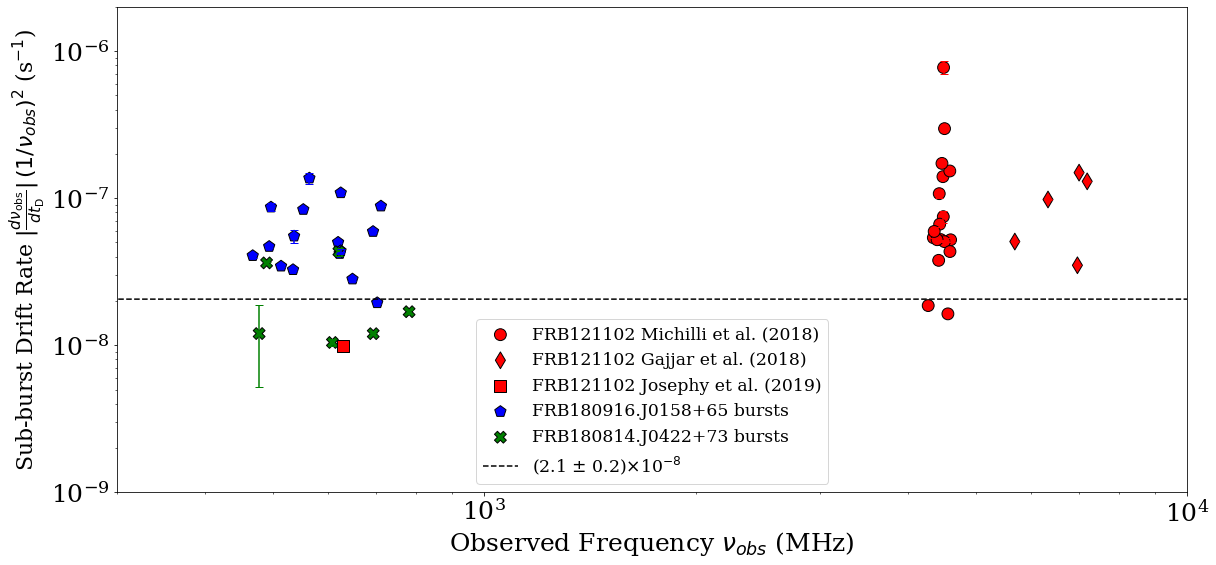

In [17]:
# michili fit
def drift_nuobs_expr(B, x):
    return B[0]*x**2

def drift_nuobs_expr_log(B, x):
    return B[0] + 2*x

def drift_nuobs_sq(B, x):
    return B[0]*np.ones(x.shape)

drift_nuobs_model = scipy.odr.Model(drift_nuobs_expr)
drift_nuobs_model_log = scipy.odr.Model(drift_nuobs_expr_log)
drift_nuobs_sq_model = scipy.odr.Model(drift_nuobs_sq)

plt.rcParams["errorbar.capsize"] = 4
plt.rcParams["font.family"] = "serif"

markersize = 140
fontsize = 25
annotsize = 14
logscale = True
filename = 'log_drift_over_nu_obsvsduration_inprep' if logscale else 'drift_over_nu_obsvsduration_inprep'
figsize = (17, 8)
# figsize = (14, 10)

michillibursts['drift_abs_z'] = michillibursts['drift_abs']*(1+michillibursts['z'])**2
michillibursts['drift_abs_nuobssq'] = michillibursts['drift_abs']*(1/michillibursts['center_f']**2)/1000
michillibursts['center_f_z'] = michillibursts['center_f']*(1+michillibursts['z'])

selectbursts180916['drift_abs_z'] = selectbursts180916['drift_abs']*(1+selectbursts180916['z'])**2
selectbursts180916['drift_abs_nuobssq'] = selectbursts180916['drift_abs']*(1/selectbursts180916['center_f']**2)/1000
selectbursts180916['center_f_z'] = selectbursts180916['center_f']*(1+selectbursts180916['z'])

selectbursts180814['drift_abs_z'] = selectbursts180814['drift_abs']*(1+selectbursts180814['z'])**2
selectbursts180814['drift_abs_nuobssq'] = selectbursts180814['drift_abs']*(1/selectbursts180814['center_f']**2)/1000
selectbursts180814['center_f_z'] = selectbursts180814['center_f']*(1+selectbursts180814['z'])

otherbursts['drift_abs_z'] = otherbursts['drift_abs']*(1+otherbursts['z'])**2
otherbursts['drift_abs_nuobssq'] = otherbursts['drift_abs']*(1/otherbursts['center_f']**2)/1000
otherbursts['center_f_z'] = otherbursts['center_f']*(1+otherbursts['z'])

ax = michillibursts.plot.scatter(x='center_f', y='drift_abs_nuobssq', 
                               yerr=np.sqrt(michillibursts['red_chisq'])*michillibursts['drift error (mhz/ms)']*(1/michillibursts['center_f']**2)/1000,
                               figsize=figsize, s=markersize, c='color', colorbar=False, fontsize=fontsize, logy=logscale, logx=logscale, marker='o', edgecolors='k',
                               label='FRB121102 Michilli et al. (2018)')
    
selectbursts180916.plot.scatter(ax=ax, x='center_f', y='drift_abs_nuobssq', 
                               yerr=np.sqrt(selectbursts180916['red_chisq'])*selectbursts180916['drift error (mhz/ms)']*(1/selectbursts180916['center_f']**2)/1000,
                               figsize=figsize, s=markersize, c='color', colorbar=False, fontsize=fontsize, logy=logscale, logx=logscale, marker='p', edgecolors='k',
                               label='FRB180916.J0158+65 bursts')
selectbursts180814.plot.scatter(ax=ax, x='center_f', y='drift_abs_nuobssq', 
                               yerr=np.sqrt(selectbursts180814['red_chisq'])*selectbursts180814['drift error (mhz/ms)']*(1/selectbursts180814['center_f']**2)/1000,
                               figsize=figsize, s=markersize, c='color', colorbar=False, fontsize=fontsize, logy=logscale, logx=logscale, marker='X', edgecolors='k',
                               label='FRB180814.J0422+73 bursts'.format(dms180814[dm_idx]))

otherbursts.head(5).plot.scatter(ax=ax, x='center_f', y='drift_abs_nuobssq',
                         yerr=np.sqrt(otherbursts['red_chisq'])*otherbursts['drift error (mhz/ms)']*(1/otherbursts['center_f']**2)/1000,
                         figsize=figsize, s=markersize, c='color', colorbar=False, marker='d', edgecolors='k', label='FRB121102 Gajjar et al. (2018)')
otherbursts.tail(1).plot.scatter(ax=ax, x='center_f', y='drift_abs_nuobssq',
                         yerr=np.sqrt(otherbursts['red_chisq'])*otherbursts['drift error (mhz/ms)']*(1/otherbursts['center_f']**2)/1000,
                         figsize=figsize, s=markersize, c='color', colorbar=False, marker='s', edgecolors='k', label='FRB121102 Josephy et al. (2019)')

# for k, v in otherbursts.iterrows():
#     ax.annotate(k+'_c', (v['tau_w_ms_corr'], v['drift_corr']), xytext=(-3,5), textcoords='offset points', weight='bold', size=annotsize)
# for k, v in michillibursts.iterrows():
#     ax.annotate(k, (v['tau_w_ms'], v['drift_abs']), xytext=(-3,5), textcoords='offset points', weight='bold', size=annotsize)
# for k, v in selectbursts180916.iterrows():
#     ax.annotate(int(k) if k != 15.5 else k, (v['tau_w_ms'], v['drift_over_nuobs']), xytext=(-3,5), textcoords='offset points', weight='bold', size=annotsize)
# for k, v in selectbursts180814.iterrows():
#     if v['drift_abs'] > 0:
#         ax.annotate(k, (v['center_f'], v['drift_abs']), xytext=(-3,5), textcoords='offset points', weight='bold', size=annotsize)

# if not logscale:
#     ax.set_xlim(-0.1, 20)
#     ax.set_ylim(-0.2, 4)
# elif logscale:
#     ax.set_xlim(0.02, 50)
#     ax.set_ylim(10**-3, 10**1)

# ax.set_title('Sub-burst Drift Rate vs. Burst Duration (fit to Michilli bursts)', size=fontsize)
ax.set_xlabel('Observed Frequency $\\nu_{obs}$ (MHz)', size=fontsize)
ax.set_ylabel('Sub-burst Drift Rate $\left|\\frac{d\\nu_\\mathrm{obs}}{dt_\\mathrm{D}}\\right|\, (1/\\nu_{obs})^{2}$ (s$^{-1}$)', size=fontsize-3)


allbursts = pd.concat([michillibursts, otherbursts, selectbursts180916, selectbursts180814])
### LINEAR FIT
fitbitch = scipy.odr.RealData(allbursts['center_f'], 
                             allbursts['drift_abs_nuobssq'],
                             sy=np.sqrt(allbursts['red_chisq'])*allbursts['drift error (mhz/ms)']*(1/allbursts['center_f']**2)/1000)
fitter_driftnuobs = scipy.odr.ODR(fitbitch, drift_nuobs_sq_model, beta0=[0.00003])
fitter_driftnuobs.set_job(fit_type=0)
fitdriftnuobs = fitter_driftnuobs.run()

### LOG FIT
# fitbitch = scipy.odr.RealData(np.log(allbursts['center_f']), 
#                              np.log(allbursts['drift_abs']))
#                              #sy=np.log(np.sqrt(allbursts['red_chisq'])*allbursts['drift error (mhz/ms)']))
# fitter_driftnuobs = scipy.odr.ODR(fitbitch, drift_nuobs_model_log, beta0=[1000])
# fitter_driftnuobs.set_job(fit_type=0)
# fitdriftnuobs = fitter_driftnuobs.run()

### Plot fits
x = np.linspace(0, 20000, num=2000)
xlog = np.log(x)
print(fitdriftnuobs.beta, fitdriftnuobs.sd_beta)

hacklbl = '(2.1 $\pm$ 0.2)$\\times$10$^{-8}$'
lbl = '({:.1e} $\pm$ {:0.2e}) $\\nu_{{obs}}^{{2}} $'.format(fitdriftnuobs.beta[0], fitdriftnuobs.sd_beta[0])
#plt.plot(x, fitdriftnuobs.beta[0]*np.ones(x.shape), 'k--', label=hacklbl)
plt.plot(x, fitdriftnuobs.beta[0]*np.ones(x.shape), 'k--', label=hacklbl)
#plt.plot(x, fitdriftnuobs.beta[0]+2*x, l, label=str((round(fitdriftnuobs.beta[0], 6))) + ' $\\nu_{obs}^{2}$')

# plt.xlim(2*10**2, 1*10**4)
# plt.ylim(10**-1, 10**5)
# plt.xlim(0, 10000); plt.ylim(-500, 20000)
handles, labels = ax.get_legend_handles_labels()
handles = [handles[1], handles[4], handles[5], handles[2], handles[3], handles[0]]
labels = [labels[1], labels[4], labels[5], labels[2], labels[3], labels[0]]
plt.legend(handles, labels, fontsize='xx-large', loc=8)

###
plt.xlim(3*10**2, 10**4)
plt.ylim(10**-9, 2*10**-6)

# plt.title("Non Redshift Corrected", size=20)
#plt.title("FRB121102, FRB180916.J0158+65, and FRB180814.J0422+73", size=20)
plt.tight_layout()
# plt.savefig('driftvsnuobs_log.pdf')

# Redshift Corrected #1

To correct for redshift we scale 
### $\frac{d\nu_{\text{obs}}}{dt_{\text{obs}}} \times \nu_{obs}^{-1} \times (1+z)$ and $t_w \,/\, (1+z)$

[0.11268937] [1.10537786]
[0.08308561] [1.42894252]


C:\Users\hmsmo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:86: RuntimeWarning: divide by zero encountered in true_divide


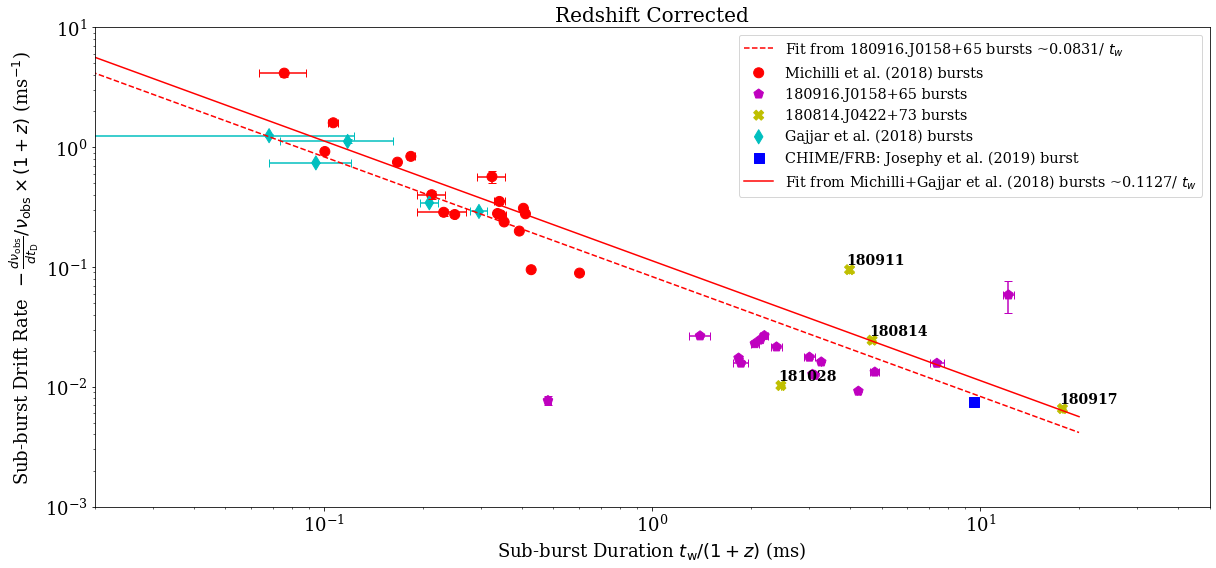

In [11]:
plt.rcParams["errorbar.capsize"] = 4
plt.rcParams["font.family"] = "serif"

markersize = 100
fontsize = 18
annotsize = 14
logscale = True
filename = 'log_drift_z_vsduration' if logscale else 'drift_z_vsduration'
figsize = (17, 8)
# figsize = (14, 10)


ax = michillibursts.plot.scatter(x='tau_w_ms_z', y='drift_z', 
                               xerr=michillibursts['red_chisq']*michillibursts['tau_w_error']/(1+michillibursts['z']),
                               yerr=michillibursts['red_chisq']*michillibursts['drift error (mhz/ms)']*(1+michillibursts['z'])/michillibursts['center_f'], 
                               figsize=figsize, s=markersize, c='color', colorbar=False, fontsize=fontsize, logy=logscale, logx=logscale, marker='o',
                               label='Michilli et al. (2018) bursts')
    
selectbursts180916.plot.scatter(ax=ax, x='tau_w_ms_z', y='drift_z', 
                               xerr=selectbursts180916['red_chisq']*selectbursts180916['tau_w_error']/(1+selectbursts180916['z']), 
                               yerr=selectbursts180916['red_chisq']*selectbursts180916['drift error (mhz/ms)']*(1+selectbursts180916['z'])/selectbursts180916['center_f'], 
                               figsize=figsize, s=markersize, c='color', colorbar=False, fontsize=fontsize, logy=logscale, logx=logscale, marker='p',
                               label='180916.J0158+65 bursts')
selectbursts180814.plot.scatter(ax=ax, x='tau_w_ms_z', y='drift_z', 
                               xerr=selectbursts180814['red_chisq']*selectbursts180814['tau_w_error']/(1+selectbursts180814['z']), 
                               yerr=selectbursts180814['red_chisq']*selectbursts180814['drift error (mhz/ms)']*(1+selectbursts180814['z'])/selectbursts180814['center_f'], 
                               figsize=figsize, s=markersize, c='color', colorbar=False, fontsize=fontsize, logy=logscale, logx=logscale, marker='X',
                               label='180814.J0422+73 bursts')

otherbursts.head(5).plot.scatter(ax=ax, x='tau_w_ms_z', y='drift_z',
                         xerr=otherbursts['red_chisq']*otherbursts['tau_w_error']/(1+otherbursts['z']), 
                         yerr=otherbursts['red_chisq']*otherbursts['drift error (mhz/ms)']*(1+otherbursts['z'])/otherbursts['center_f'], 
                         figsize=figsize, s=markersize, c='color', colorbar=False, marker='d', label='Gajjar et al. (2018) bursts')
otherbursts.tail(1).plot.scatter(ax=ax, x='tau_w_ms_z', y='drift_z',
                         xerr=otherbursts['red_chisq']*otherbursts['tau_w_error']/(1+otherbursts['z']), 
                         yerr=otherbursts['red_chisq']*otherbursts['drift error (mhz/ms)']*(1+otherbursts['z'])/otherbursts['center_f'], 
                         figsize=figsize, s=markersize, c='color', colorbar=False, marker='s', label='CHIME/FRB: Josephy et al. (2019) burst')

# for k, v in otherbursts.iterrows():
#     ax.annotate(k+'_c', (v['tau_w_ms_corr'], v['drift_corr']), xytext=(-3,5), textcoords='offset points', weight='bold', size=annotsize)
# for k, v in michillibursts.iterrows():
#     ax.annotate(k, (v['tau_w_ms_z'], v['drift_abs']), xytext=(-3,5), textcoords='offset points', weight='bold', size=annotsize)
# for k, v in selectbursts180916.iterrows():
#     ax.annotate(int(k) if k != 15.5 else k, (v['tau_w_ms_corr'], v['drift_corr']), xytext=(-3,5), textcoords='offset points', weight='bold', size=annotsize)
for k, v in selectbursts180814.iterrows():
    ax.annotate(k.split('burst')[1], (v['tau_w_ms_z'], v['drift_z']), xytext=(-3,5), textcoords='offset points', weight='bold', size=annotsize)

if not logscale:
    ax.set_xlim(-0.1, 20)
    ax.set_ylim(-0.2, 4)
elif logscale:
    ax.set_xlim(0.02, 50)
    ax.set_ylim(10**-3, 10**1)

# ax.set_title('Sub-burst Drift Rate vs. Burst Duration (fit to Michilli bursts)', size=fontsize)
ax.set_xlabel('Sub-burst Duration $t_\\mathrm{w} / (1+z)$ (ms)', size=fontsize)
ax.set_ylabel('Sub-burst Drift Rate $\,-\\frac{d\\nu_\\mathrm{obs}}{dt_\\mathrm{D}} / \\nu_\\mathrm{obs} \\times (1+z)$ (ms$^{-1}$)', size=fontsize)


# ODR fit log
fitdata_log = scipy.odr.RealData(np.log(selectbursts121102.head(23)['tau_w_ms_z']), 
                             np.log(selectbursts121102.head(23)['drift_z']),
                             sx=np.log(selectbursts121102.head(23)['red_chisq']*selectbursts121102.head(23)['tau_w_error']/(1+selectbursts121102.head(23)['z'])), 
                             sy=np.log(selectbursts121102.head(23)['red_chisq']*selectbursts121102.head(23)['drift error (mhz/ms)']*(1+selectbursts121102.head(23)['z'])/selectbursts121102.head(23)['center_f'] ))
odrfitter_log = scipy.odr.ODR(fitdata_log, fit_model_log, beta0=[500])
odrfitter_log.set_job(fit_type=0)
odrfit_log = odrfitter_log.run()

# ODR fit log 180916
fitdata_log_180916 = scipy.odr.RealData(np.log(selectbursts180916['tau_w_ms_z']), 
                             np.log(selectbursts180916['drift_z']),
                             sx=np.log(selectbursts180916['red_chisq']*selectbursts180916['tau_w_error']/(1+selectbursts180916['z'])), 
                             sy=np.log(selectbursts180916['red_chisq']*selectbursts180916['drift error (mhz/ms)']*(1+selectbursts180916['z'])/selectbursts180916['center_f'] ))
odrfitter_log180916 = scipy.odr.ODR(fitdata_log_180916, fit_model_log, beta0=[1000])
odrfitter_log180916.set_job(fit_type=0)
odrfit_log180916 = odrfitter_log180916.run()

### Plot fits
x = np.linspace(0, 20, num=1200)
opts  = [np.exp(odrfit_log.beta), np.exp(odrfit_log180916.beta)]
errs  = [np.exp(odrfit_log.sd_beta), np.exp(odrfit_log180916.sd_beta)]
names = ['Fit from Michilli+Gajjar et al. (2018) bursts', 'Fit from 180916.J0158+65 bursts']
ls    = ['r-', 'r--']
for opt, err, name, l in zip(opts, errs, names, ls):
    print(opt, err)
    plt.plot(x, opt[0]/x, l, label=name + ' ~' + str((round(opt[0], 4))) + '/ $t_w$')

# plt.plot(x, odrfit.beta[0]/x, 'b-', label='6. x and y error \t\t${:.2f} \pm {:.2f}$'.format(odrfit.beta[0], odrfit.sd_beta[0])+'/$t_w$')

# a = np.exp(popt_log_log[1])
# k = popt_log_log[0]
# plt.plot(x, a * x**k, 'r-', label='loglog \t\t\t\t\t${:.2f}~t_w^{{{:.2f}}}$'.format(a,k))

handles, labels = ax.get_legend_handles_labels()
handles = handles [1:] + [handles[0]]
labels = labels [1:] + [labels[0]]
plt.legend(handles, labels, fontsize='x-large')

plt.title("Redshift Corrected", size=20)
plt.tight_layout()

# for f in ['png', 'pdf', 'eps']: plt.savefig('figures/{}.{}'.format(filename, f))

# Redshift Corrected #2

To correct for redshift we correct the drifts and durations to the Michilli observing frequency and then scale 
### $\frac{d\nu_{\text{obs}}}{dt_{\text{obs}}} \times (1+z)^2$ and $t_w \,/\, (1+z)$

[529.81643043] [1.11078483]
[234.21800614] [1.23291917]


C:\Users\hmsmo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:85: RuntimeWarning: divide by zero encountered in true_divide


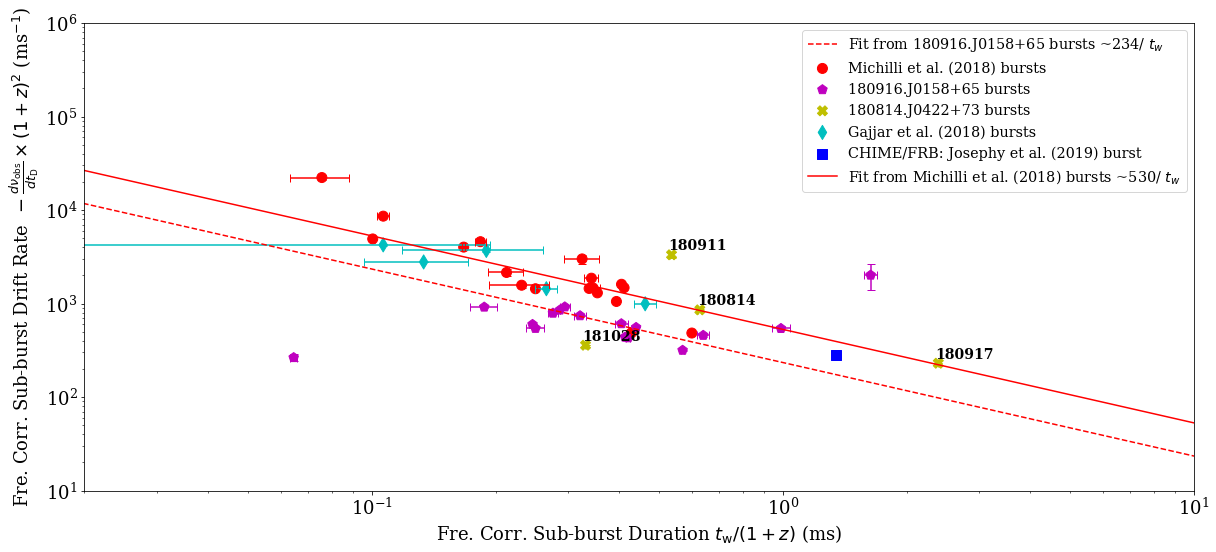

In [12]:
plt.rcParams["errorbar.capsize"] = 4
plt.rcParams["font.family"] = "serif"

markersize = 100
fontsize = 18
annotsize = 14
logscale = True
filename = 'log_drift_z_vsduration' if logscale else 'drift_z_vsduration'
figsize = (17, 8)
# figsize = (14, 10)


ax = michillibursts.plot.scatter(x='tau_w_ms_z', y='drift_z_abs', 
                               xerr=michillibursts['red_chisq']*michillibursts['tau_w_error']/(1+michillibursts['z']),
                               yerr=michillibursts['red_chisq']*michillibursts['drift error (mhz/ms)']*(1+michillibursts['z'])**2, 
                               figsize=figsize, s=markersize, c='color', colorbar=False, fontsize=fontsize, logy=logscale, logx=logscale, marker='o',
                               label='Michilli et al. (2018) bursts')
    
selectbursts180916.plot.scatter(ax=ax, x='tau_w_ms_z_corr', y='drift_z_corr', 
                               xerr=selectbursts180916['red_chisq']*selectbursts180916['tau_w_err_corr']/(1+selectbursts180916['z']), 
                               yerr=selectbursts180916['red_chisq']*selectbursts180916['drift_err_corr']*(1+selectbursts180916['z'])**2, 
                               figsize=figsize, s=markersize, c='color', colorbar=False, fontsize=fontsize, logy=logscale, logx=logscale, marker='p',
                               label='180916.J0158+65 bursts')
selectbursts180814.plot.scatter(ax=ax, x='tau_w_ms_z_corr', y='drift_z_corr', 
                               xerr=selectbursts180814['red_chisq']*selectbursts180814['tau_w_err_corr']/(1+selectbursts180814['z']), 
                               yerr=selectbursts180814['red_chisq']*selectbursts180814['drift_err_corr']*(1+selectbursts180814['z'])**2, 
                               figsize=figsize, s=markersize, c='color', colorbar=False, fontsize=fontsize, logy=logscale, logx=logscale, marker='X',
                               label='180814.J0422+73 bursts')

otherbursts.head(5).plot.scatter(ax=ax, x='tau_w_ms_z_corr', y='drift_z_corr',
                         xerr=otherbursts['red_chisq']*otherbursts['tau_w_err_corr']/(1+otherbursts['z']), 
                         yerr=otherbursts['red_chisq']*otherbursts['drift_err_corr']*(1+otherbursts['z'])**2, 
                         figsize=figsize, s=markersize, c='color', colorbar=False, marker='d', label='Gajjar et al. (2018) bursts')
otherbursts.tail(1).plot.scatter(ax=ax, x='tau_w_ms_z_corr', y='drift_z_corr',
                         xerr=otherbursts['red_chisq']*otherbursts['tau_w_err_corr']/(1+otherbursts['z']), 
                         yerr=otherbursts['red_chisq']*otherbursts['drift_err_corr']*(1+otherbursts['z'])**2, 
                         figsize=figsize, s=markersize, c='color', colorbar=False, marker='s', label='CHIME/FRB: Josephy et al. (2019) burst')

# for k, v in otherbursts.iterrows():
#     ax.annotate(k+'_c', (v['tau_w_ms_corr'], v['drift_corr']), xytext=(-3,5), textcoords='offset points', weight='bold', size=annotsize)
# for k, v in michillibursts.iterrows():
#     ax.annotate(k, (v['tau_w_ms_z'], v['drift_abs']), xytext=(-3,5), textcoords='offset points', weight='bold', size=annotsize)
# for k, v in selectbursts180916.iterrows():
#     ax.annotate(int(k) if k != 15.5 else k, (v['tau_w_ms_corr'], v['drift_corr']), xytext=(-3,5), textcoords='offset points', weight='bold', size=annotsize)
for k, v in selectbursts180814.iterrows():
    ax.annotate(k.split('burst')[1], (v['tau_w_ms_z_corr'], v['drift_z_corr']), xytext=(-3,5), textcoords='offset points', weight='bold', size=annotsize)

if not logscale:
    ax.set_xlim(-0.1, 20)
    ax.set_ylim(-0.2, 4)
elif logscale:
    ax.set_xlim(0.02, 10)
    ax.set_ylim(10**1, 10**6)

# ax.set_title('Sub-burst Drift Rate vs. Burst Duration (fit to Michilli bursts)', size=fontsize)
ax.set_xlabel('Fre. Corr. Sub-burst Duration $t_\\mathrm{w} / (1+z)$ (ms)', size=fontsize)
ax.set_ylabel('Fre. Corr. Sub-burst Drift Rate $\,-\\frac{d\\nu_\\mathrm{obs}}{dt_\\mathrm{D}} \\times (1+z)^2$ (ms$^{-1}$)', size=fontsize)

# ODR fit log
fitdata_log = scipy.odr.RealData(np.log(michillibursts['tau_w_ms_z']), 
                             np.log(michillibursts['drift_z_abs']),
                             sx=np.log(michillibursts['red_chisq']*michillibursts['tau_w_error']/(1+michillibursts['z'])), 
                             sy=np.log(michillibursts['red_chisq']*michillibursts['drift error (mhz/ms)']*(1+michillibursts['z']**2)))
odrfitter_log = scipy.odr.ODR(fitdata_log, fit_model_log, beta0=[500])
odrfitter_log.set_job(fit_type=0)
odrfit_log = odrfitter_log.run()

# ODR fit log 180916
fitdata_log_180916 = scipy.odr.RealData(np.log(selectbursts180916['tau_w_ms_z_corr']), 
                             np.log(selectbursts180916['drift_z_corr']),
                             sx=np.log(selectbursts180916['red_chisq']*selectbursts180916['tau_w_err_corr']/(1+selectbursts180916['z'])), 
                             sy=np.log(selectbursts180916['red_chisq']*selectbursts180916['drift_err_corr']*(1+selectbursts180916['z']**2)))
odrfitter_log180916 = scipy.odr.ODR(fitdata_log_180916, fit_model_log, beta0=[1000])
odrfitter_log180916.set_job(fit_type=0)
odrfit_log180916 = odrfitter_log180916.run()

### Plot fits
x = np.linspace(0, 20, num=1200)
opts  = [np.exp(odrfit_log.beta), np.exp(odrfit_log180916.beta)]
errs  = [np.exp(odrfit_log.sd_beta), np.exp(odrfit_log180916.sd_beta)]
names = ['Fit from Michilli et al. (2018) bursts', 'Fit from 180916.J0158+65 bursts']
ls    = ['r-', 'r--']
for opt, err, name, l in zip(opts, errs, names, ls):
    print(opt, err)
    plt.plot(x, opt[0]/x, l, label=name + ' ~' + str(int(round(opt[0]))) + '/ $t_w$')

handles, labels = ax.get_legend_handles_labels()
handles = handles [1:] + [handles[0]]
labels = labels [1:] + [labels[0]]
plt.legend(handles, labels, fontsize='x-large')

plt.tight_layout()
# for f in ['png', 'pdf', 'eps']: plt.savefig('figures/{}.{}'.format(filename, f))